In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import requests
import json
import datetime

In [2]:
pjmdf = pd.read_csv('rawdf_pjm.csv')
pjmdf.head()

,Unnamed: 0,pnodeId,price_01,price_02,price_03,price_04,price_05,price_06,price_07,price_08,price_09,price_10,price_11,price_12,price_13,price_14,price_15,price_16,price_17,price_18,price_19,price_20,price_21,price_22,price_23,price_24,publishDate
0,0,32417601,2.48,14.23,13.66,21.55,21.44,21.79,22.94,24.15,23.06,26.53,29.16,26.03,27.36,26.25,26.41,26.57,28.61,65.92,72.45,75.68,76.83,46.26,44.68,28.91,2008-01-01
1,1,32417601,26.73,31.48,30.66,27.92,35.38,31.03,41.06,90.86,108.73,138.98,102.04,89.39,80.84,92.72,52.36,28.21,52.29,85.35,129.36,153.18,161.66,102.92,98.31,65.93,2008-01-02
2,2,32417601,191.99,60.30,45.30,70.30,61.71,49.43,56.30,113.23,105.20,78.29,45.28,52.23,69.05,66.20,53.44,31.91,55.90,31.72,73.64,68.42,76.62,70.43,57.13,63.90,2008-01-03
3,3,32417601,40.36,35.20,33.61,27.98,24.98,30.54,41.90,66.48,78.02,65.31,68.80,38.89,47.09,33.41,24.32,26.75,28.74,60.48,44.26,38.80,38.36,29.07,30.21,26.46,2008-01-04
4,4,32417601,35.13,34.19,25.23,24.42,23.09,24.00,23.54,30.27,37.55,56.69,67.66,56.65,33.43,38.33,29.52,33.23,39.43,69.88,45.50,42.07,35.96,35.54,24.52,27.46,2008-01-05


In [3]:
pjmdf.drop(labels = 'Unnamed: 0', axis = 1, inplace = True)
pjmdf.head()

,pnodeId,price_01,price_02,price_03,price_04,price_05,price_06,price_07,price_08,price_09,price_10,price_11,price_12,price_13,price_14,price_15,price_16,price_17,price_18,price_19,price_20,price_21,price_22,price_23,price_24,publishDate
0,32417601,2.48,14.23,13.66,21.55,21.44,21.79,22.94,24.15,23.06,26.53,29.16,26.03,27.36,26.25,26.41,26.57,28.61,65.92,72.45,75.68,76.83,46.26,44.68,28.91,2008-01-01
1,32417601,26.73,31.48,30.66,27.92,35.38,31.03,41.06,90.86,108.73,138.98,102.04,89.39,80.84,92.72,52.36,28.21,52.29,85.35,129.36,153.18,161.66,102.92,98.31,65.93,2008-01-02
2,32417601,191.99,60.30,45.30,70.30,61.71,49.43,56.30,113.23,105.20,78.29,45.28,52.23,69.05,66.20,53.44,31.91,55.90,31.72,73.64,68.42,76.62,70.43,57.13,63.90,2008-01-03
3,32417601,40.36,35.20,33.61,27.98,24.98,30.54,41.90,66.48,78.02,65.31,68.80,38.89,47.09,33.41,24.32,26.75,28.74,60.48,44.26,38.80,38.36,29.07,30.21,26.46,2008-01-04
4,32417601,35.13,34.19,25.23,24.42,23.09,24.00,23.54,30.27,37.55,56.69,67.66,56.65,33.43,38.33,29.52,33.23,39.43,69.88,45.50,42.07,35.96,35.54,24.52,27.46,2008-01-05


In [7]:
pjmdf.shape

(20097, 26)

In [174]:
dfpn7601 = pjmdf[pjmdf['pnodeId']==32417601]
df = dfpn7601[:1460]
df = df.drop('pnodeId',1)
df = df.drop('publishDate',1)
df = df.fillna(0)
lmp = df.stack()
rng = pd.date_range('1/1/2008', periods = 35040, freq = 'H')
lmp.index = rng

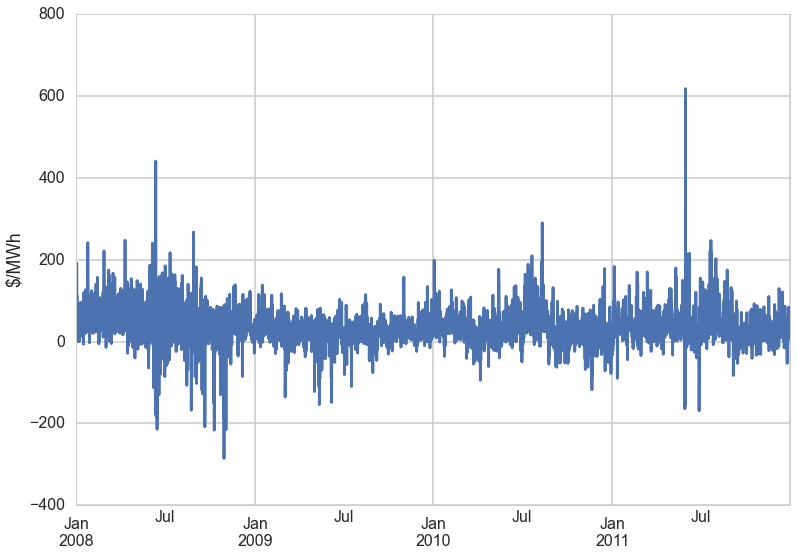

In [113]:
lmp.plot()
plt.ylabel('$/MWh')

In [173]:
pjm_load = pd.read_csv('data/PJM_hourly_load_08_15.csv')
ldf = pjm_load[:1460]
ldf = ldf.drop('DATE',1)
ldf = ldf.drop('COMP',1)
ldf = ldf.drop('Unnamed: 26',1)
ldf = ldf.drop('Unnamed: 27',1)
ldf = ldf.fillna(0)
load = ldf.stack()
rng = pd.date_range('1/1/2008', periods = 35040, freq = 'H')
load.index = rng

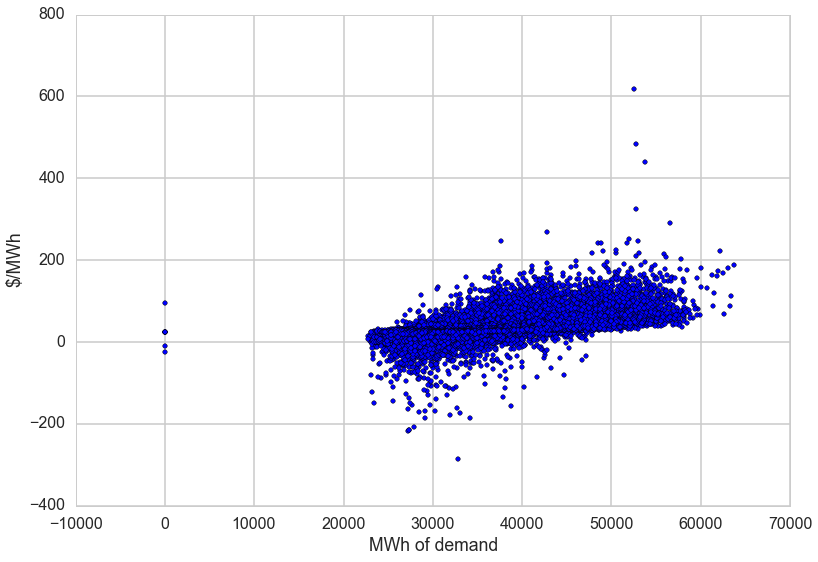

In [114]:
plt.scatter(load,lmp)
plt.xlabel('MWh of demand')
plt.ylabel('$/MWh')

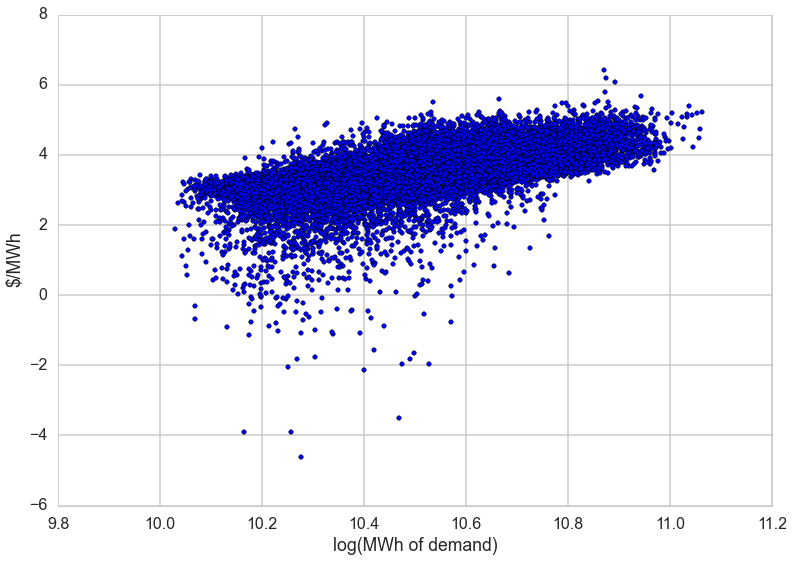

In [115]:
plt.scatter(np.log(load),np.log(lmp))
plt.xlabel('log(MWh of demand)')
plt.ylabel('$/MWh')

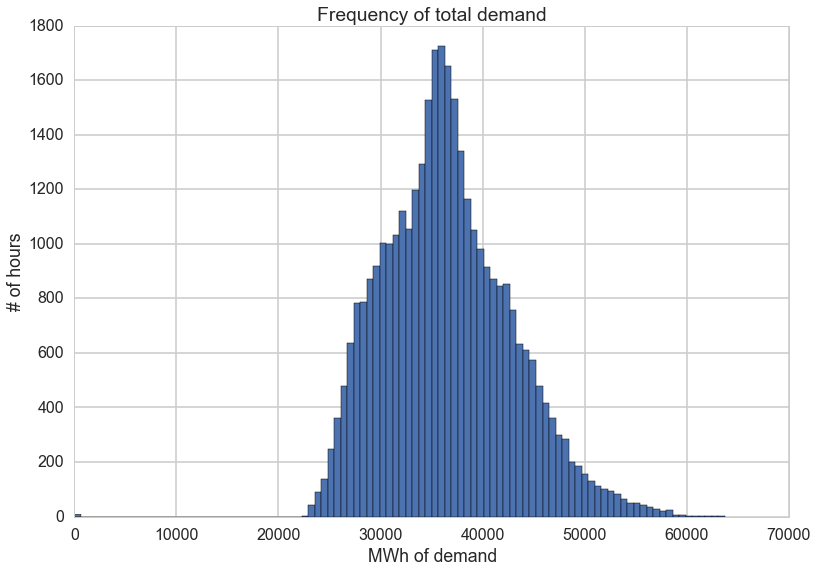

In [117]:
ldf = pd.DataFrame(load)
ldf.hist(bins=100)
plt.title('Frequency of total demand')
plt.xlabel('MWh of demand')
plt.ylabel('# of hours')

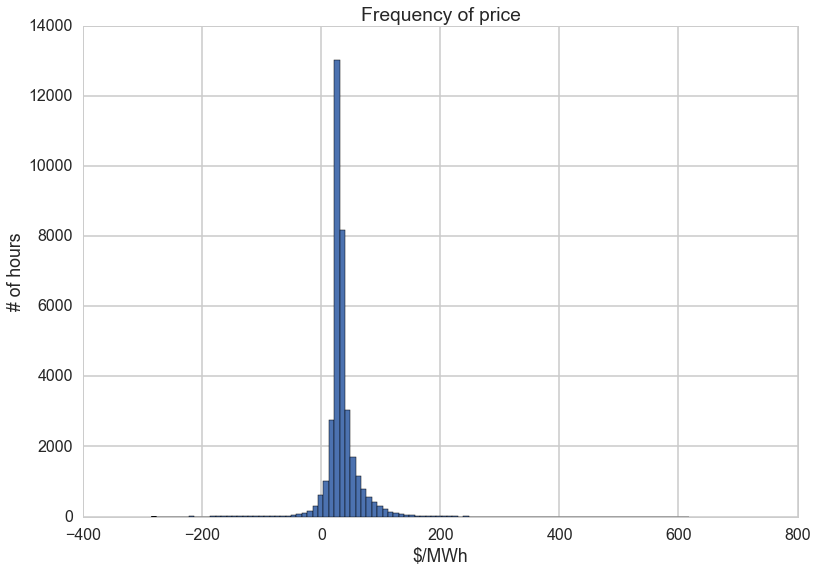

In [118]:
lmpdf = pd.DataFrame(lmp)
lmpdf.hist(bins=100)
plt.title('Frequency of price')
plt.xlabel('$/MWh')
plt.ylabel('# of hours')

In [172]:
pjm_wind = pd.read_csv('data/PJM_Wind/PJM_hourly_wind_08_11.csv')
wdf = pjm_wind[:1460]
wdf = wdf.drop('DATE',1)
wdf = wdf.drop('COMP',1)
wdf = wdf.fillna(0)
wind = wdf.stack()
rng = pd.date_range('1/1/2008', periods = 35040, freq = 'H')
wind.index = rng

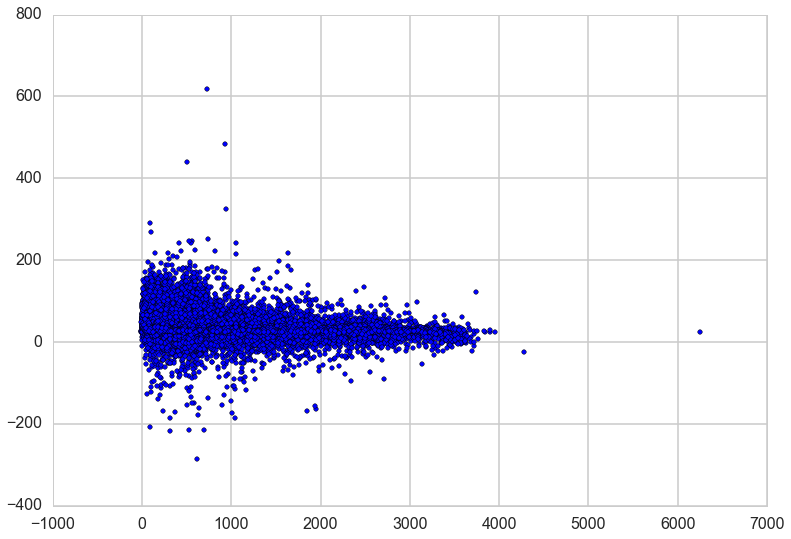

In [143]:
plt.scatter(wind, lmp)

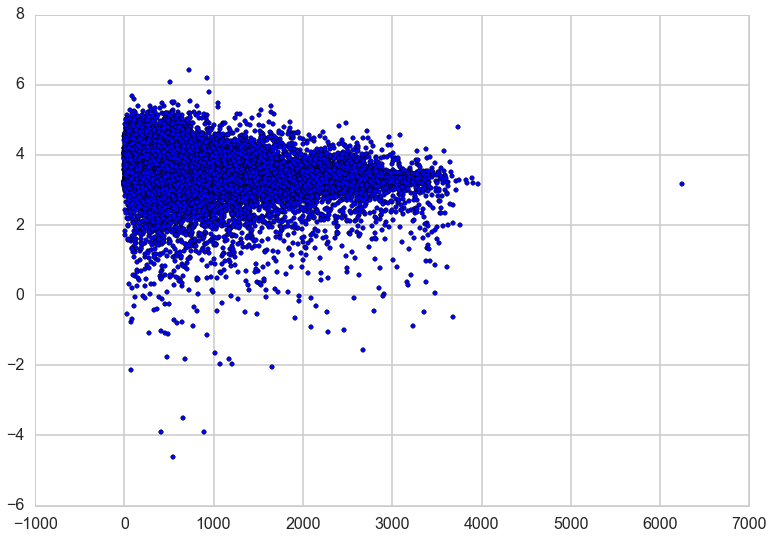

In [183]:
plt.scatter(wind, np.log(lmp))

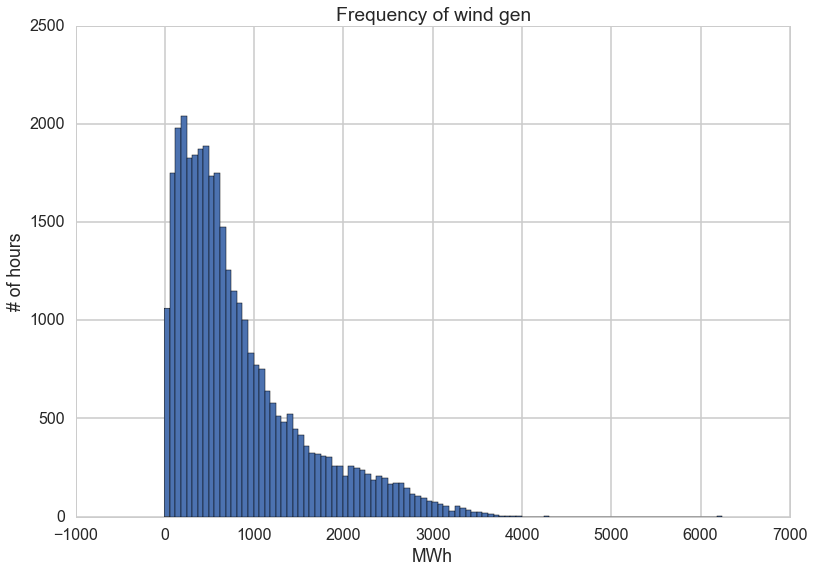

In [184]:
winddf = pd.DataFrame(wind)
winddf.hist(bins=100)
plt.title('Frequency of wind gen')
plt.xlabel('MWh')
plt.ylabel('# of hours')

In [204]:
temp = np.log(pd.DataFrame(wind))

temp.head()

,0
2008-01-01 00:00:00,6.546932
2008-01-01 01:00:00,6.520689
2008-01-01 02:00:00,6.449849
2008-01-01 03:00:00,6.417304
2008-01-01 04:00:00,6.430498


In [228]:
lmpdf = pd.DataFrame(lmp)
loaddf = pd.DataFrame(load)
winddf = pd.DataFrame(wind)

#lmpdf.columns = ['date','lmp']

In [229]:
lmpdf['wind'] = winddf
lmpdf['load'] = loaddf
lmpdf.columns = ['lmp','wind', 'load']

In [300]:
lmpdf.to_csv('../df.csv')
dfNG.to_csv('../ngdf.csv')

In [231]:
import statsmodels.formula.api as smf

In [320]:
lm = smf.ols(formula = 'lmp ~ load + wind', data = lmpdf).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lmp   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     9322.
Date:                Wed, 25 Nov 2015   Prob (F-statistic):               0.00
Time:                        13:09:38   Log-Likelihood:            -1.5502e+05
No. Observations:               35040   AIC:                         3.101e+05
Df Residuals:                   35037   BIC:                         3.101e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -42.7996      0.670    -63.867      0.000       -44.113   -41.486
load           0.0022   1.73e-05    128.243      0.000         0.002     0.002
wind          -0.0046      0.000    -30.583      0.000        -0.005    -0.004
==============================================================================
Omnibus:                    17431.407   Durbin-Watson:                   0.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2328542.211
Skew:                           1.384   Prob(JB):                         0.00
Kurtosis:                      42.840   Cond. No.                     2.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Adding in NG prices

In [301]:
df = pd.read_csv('data/LMP_features_08_12.csv')
df = df.set_index(['date'])

In [319]:
lm = smf.ols(formula = 'lmp ~ load + ng + wind', data = df).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lmp   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     7578.
Date:                Wed, 25 Nov 2015   Prob (F-statistic):               0.00
Time:                        13:09:19   Log-Likelihood:            -1.5374e+05
No. Observations:               35040   AIC:                         3.075e+05
Df Residuals:                   35036   BIC:                         3.075e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -53.7179      0.680    -79.038      0.000       -55.050   -52.386
load           0.0021   1.68e-05    125.885      0.000         0.002     0.002
ng             2.3933      0.046     51.680      0.000         2.303     2.484
wind          -0.0021      0.000    -13.847      0.000        -0.002    -0.002
==============================================================================
Omnibus:                    15399.868   Durbin-Watson:                   0.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3221489.813
Skew:                           0.977   Prob(JB):                         0.00
Kurtosis:                      49.933   Cond. No.                     2.43e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [329]:
dflog = df
dflog['log_lmp'] = np.log(df['lmp'])
dflog['log_wind'] = np.log(df['wind'])
dflog['log_load'] = np.log(df['load'])
dflog['log_ng'] = np.log(df['ng'])

In [338]:
dflog.head()

,lmp,wind,load,ng,log_lmp,log_wind,log_load,log_ng
date,,,,,,,,
1/1/2008 0:00,2.48,697.102,33534,7.83,0.908259,6.546932,10.420315,2.057963
1/1/2008 1:00,14.23,679.046,32632,7.83,2.655352,6.520689,10.393049,2.057963
1/1/2008 2:00,13.66,632.607,31828,7.83,2.614472,6.449849,10.368102,2.057963
1/1/2008 3:00,21.55,612.350,31565,7.83,3.070376,6.417304,10.359804,2.057963
1/1/2008 4:00,21.44,620.483,31542,7.83,3.065258,6.430498,10.359075,2.057963


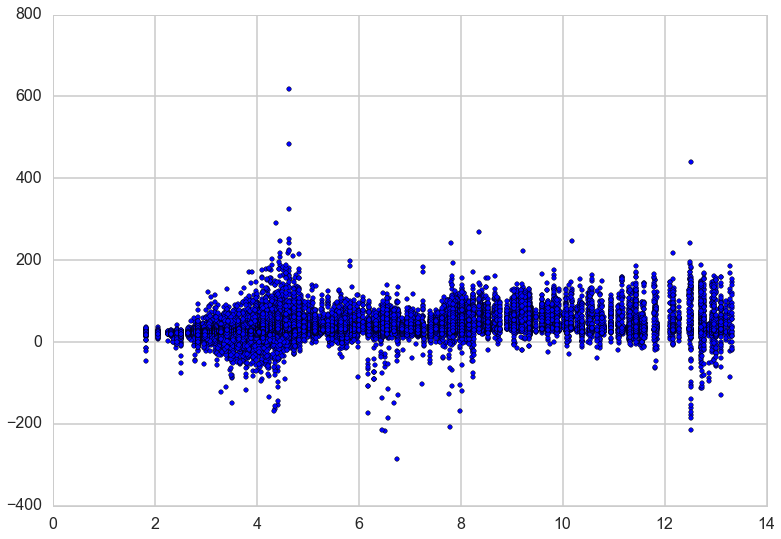

In [341]:
#y = dflog['log_lmp']
#x = dflog['log_ng']
y = dflog['lmp']
x = dflog['ng']

plt.scatter(x,y)

In [343]:
lm = smf.ols(formula = 'lmp ~ ng + load', data = dflog).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lmp   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                 1.121e+04
Date:                Wed, 25 Nov 2015   Prob (F-statistic):               0.00
Time:                        13:18:14   Log-Likelihood:            -1.5383e+05
No. Observations:               35040   AIC:                         3.077e+05
Df Residuals:                   35037   BIC:                         3.077e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -57.2364      0.632    -90.553      0.000       -58.475   -55.997
ng             2.5951      0.044     58.879      0.000         2.509     2.682
load           0.0021   1.68e-05    127.039      0.000         0.002     0.002
==============================================================================
Omnibus:                    15232.698   Durbin-Watson:                   0.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3150063.884
Skew:                           0.956   Prob(JB):                         0.00
Kurtosis:                      49.410   Cond. No.                     2.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [344]:
lm.pvalues

Intercept    0
ng           0
load         0
dtype: float64